In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5p-220m")

inputs = tokenizer.encode(" Predicts the model for the given image. Args: X_img_path: Path to the image to predict. knn_clf: The classifier to use. model_path: Path to the model to use. distance_threshold: The maximum number of times the model is found in the image. Returns: A list of the classifiers that are not within the threshold.", truncation=True)
print(f" len inputs: {len(inputs)}")
print(tokenizer.decode(inputs))

 len inputs: 80
<s> Predicts the model for the given image. Args: X_img_path: Path to the image to predict. knn_clf: The classifier to use. model_path: Path to the model to use. distance_threshold: The maximum number of times the model is found in the image. Returns: A list of the classifiers that are not within the threshold.</s>


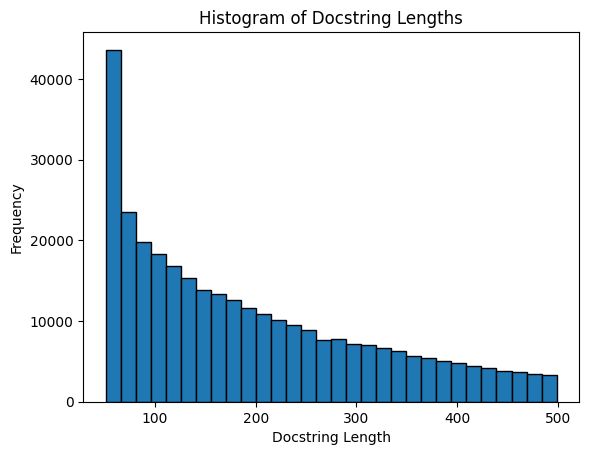

In [55]:
import datasets
import matplotlib.pyplot as plt
import os

if(os.path.exists("../docstring_len_filtered.ds")):
    docstrings = datasets.load_from_disk("../docstring_len_filtered.ds")["train"]
else:
    print("Loading dataset")

docstring_lengths = [len(docstring) for docstring in docstrings["docstring"]]

#docstring_lengths = list(filter(lambda x: x < 2000, docstring_lengths))

plt.hist(docstring_lengths, bins=30, edgecolor='black')
plt.xlabel('Docstring Length')
plt.ylabel('Frequency')
plt.title('Histogram of Docstring Lengths')
plt.show()

In [33]:
import datasets
import pandas as pd

dataset = datasets.load_dataset("juraj-juraj/doc_gen")

train_dataset = pd.DataFrame.from_dict(dataset["train"])


/home/juraj/.local/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [34]:


train_dataset = train_dataset[train_dataset["docstring"].str.len() > 50]
train_dataset = train_dataset[train_dataset["docstring"].str.len() < 500]

eval_dataset = pd.DataFrame.from_dict(dataset["validation"])
eval_dataset = eval_dataset[eval_dataset["docstring"].str.len() > 50]
eval_dataset = eval_dataset[eval_dataset["docstring"].str.len() < 500]

test_dataset = pd.DataFrame.from_dict(dataset["test"])
test_dataset = test_dataset[test_dataset["docstring"].str.len() > 50]
test_dataset = test_dataset[test_dataset["docstring"].str.len() < 500]


In [38]:
s = train_dataset.copy().reset_index()
s[["docstring", "function"]]

,docstring,function
0,converts a style_dict to an xlsxwriter format ...,"def convert(cls, style_dict, num_format_str=No..."
1,Convert DataFrame to Series with multi-level I...,"def stack(frame, level=-1, dropna=True):\n ..."
2,Parameters\n ----------\n s: string\n ...,"def _split_line(s, parts):\n \n out = {}..."
3,Parse a vector of float values representing IB...,def _parse_float_vec(vec):\n \n\n dtype ...
4,Get number of records in file.\n\n This...,def _record_count(self):\n \n\n ...
...,...,...
314708,Trim this fastqSequence in-place by removing <...,"def trimRight(self, amount):\n \n if amo..."
314709,Trim this fastqSequence in-place by removing <...,"def trimLeft(self, amount):\n \n if amou..."
314710,Get the realtive quality score (i.e. the phred...,"def getRelativeQualityScore(self, i, score_typ..."
314711,:return: string representation of this NGS rea...,"def to_fastq_str(self):\n \n return ""@"" ..."


In [39]:
train_dataset = train_dataset.reset_index()
eval_dataset = eval_dataset.reset_index()
test_dataset = test_dataset.reset_index()

In [47]:
from datasets import Dataset, DatasetDict

ds_train = Dataset.from_pandas(train_dataset[["docstring", "function"]])
ds_validation = Dataset.from_pandas(eval_dataset[["docstring", "function"]])
ds_test = Dataset.from_pandas(test_dataset[["docstring", "function"]])

ds_train["docstring"]


['converts a style_dict to an xlsxwriter format dict\n\n        Parameters\n        ----------\n        style_dict : style dictionary to convert\n        num_format_str : optional number format string',
 'Convert DataFrame to Series with multi-level Index. Columns become the\n    second level of the resulting hierarchical index\n\n    Returns\n    -------\n    stacked : Series',
 "Parameters\n    ----------\n    s: string\n        Fixed-length string to split\n    parts: list of (name, length) pairs\n        Used to break up string, name '_' will be filtered from output.\n\n    Returns\n    -------\n    Dict of name:contents of string at given location.",
 'Parse a vector of float values representing IBM 8 byte floats into\n    native 8 byte floats.',
 'Get number of records in file.\n\n        This is maybe suboptimal because we have to seek to the end of\n        the file.\n\n        Side effect: returns file position to record_start.',
 'Reads lines from Xport file and returns as da

In [48]:
dataset_dict = DatasetDict(
        {
            "train": ds_train,
            "validation": ds_validation,
            "test": ds_test,
        }
    )

dataset_dict.save_to_disk("../docstring_len_filtered.ds")

Saving the dataset (1/1 shards): 100%|██████████| 401/401 [00:00<00:00, 157970.87 examples/s]


In [49]:
dataset_dict = datasets.load_from_disk("../docstring_len_filtered.ds")
dataset_dict["train"]["docstring"]

['converts a style_dict to an xlsxwriter format dict\n\n        Parameters\n        ----------\n        style_dict : style dictionary to convert\n        num_format_str : optional number format string',
 'Convert DataFrame to Series with multi-level Index. Columns become the\n    second level of the resulting hierarchical index\n\n    Returns\n    -------\n    stacked : Series',
 "Parameters\n    ----------\n    s: string\n        Fixed-length string to split\n    parts: list of (name, length) pairs\n        Used to break up string, name '_' will be filtered from output.\n\n    Returns\n    -------\n    Dict of name:contents of string at given location.",
 'Parse a vector of float values representing IBM 8 byte floats into\n    native 8 byte floats.',
 'Get number of records in file.\n\n        This is maybe suboptimal because we have to seek to the end of\n        the file.\n\n        Side effect: returns file position to record_start.',
 'Reads lines from Xport file and returns as da